# Data Aggregation and Group Operations I

We have completed (most of) the data processing component of the course, and will now shift to focusing (primarily) on descriptive analytics and data visualization. You have obviously had some exposure to these topics in Data Models and Decisions, as well as prior coursework and experience, but our goal here is to continue developing those skills within the Python ecosystem to tell effective data stories.

Today, we will introduce data aggregation and group operations, which we will cover over two classes:

* Today: GroupBy Mechanics and Data Aggregation
* Thursday: Applying Functions to Groups and Pivot Tables

Friendly Reminders:

* Project update, now due by April 3 at 11:59 p.m.

In [2]:
import numpy as np
import pandas as pd

## GroupBy Mechanics

GroupBy mechanics refer to the process of:

* Splitting your data into groups according to some criteria (e.g., a categorical variable)
* Applying a function to each group
* Combining the results into a data structure

![test](https://www.safaribooksonline.com/library/view/learning-pandas/9781783985128/graphics/5128OS_09_01.jpg)

The process of applying GroupBy mechanis typically occurs in three steps, which can be executed in separate statements or combined into a single statement using chaining:

1. Select object to group (e.g., Series or DataFrame)
2. Call .groupby method, specifying how observations will be grouped (next)
3. Apply function(s) to grouped object (later)

There are 4 ways to group the observations in a pandas data structure (Series or DataFrame):

1. By a sequence of values that is the same length as the axis being grouped
2. By a DataFrame column name (DataFrame only)
3. By a dictionary or Series giving a correspondence between the values on the axis being grouped and the group names
4. By the results of a function call invoked on the axis index or the individual labels in the index

The latter 3 methods are all shortcuts for producing a sequence of values that are used to split the data structure into groups (whereas the first method is an explicit list of values).

Similar to our coverage of hierarchical indexing, our discussion on data aggregation and group operations will focus primarily on the rows of our data (axis=0), but these techniques can be applied to columns (axis=1) in a similar fashion.

In [3]:
# Load movies data
path = '~/Downloads/BUDT_758X_Python/DataFiles/'
df = pd.read_csv(path + 'movies.csv')
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71,5.343622,40,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81,8.096000,87,60.720000,2009
2,A Dangerous Method,Drama,Independent,89,0.448645,79,8.972895,2011
3,A Serious Man,Drama,Universal,64,4.382857,89,30.680000,2009
4,Across the Universe,Romance,Independent,84,0.652603,54,29.367143,2007


In [4]:
# Group by sequence of genre values - Method 1
import matplotlib.pyplot as plt
%matplotlib inline
grouped = df.groupby(by=df['Genre'])
grouped.count()

,Film,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Genre,,,,,,,
Action,1,1,1,1,1,1,1
Animation,3,3,3,3,3,3,3
Comedy,38,38,38,38,38,38,38
Drama,13,13,13,13,13,13,13
Fantasy,1,1,1,1,1,1,1
Romance,12,12,12,12,12,12,12


<function matplotlib.pyplot.show>

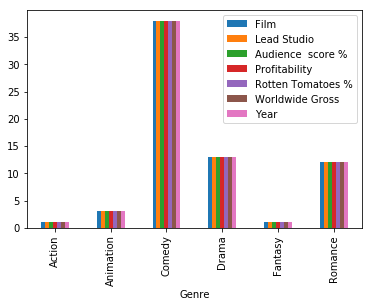

In [5]:
grouped.count().plot(kind='bar')
plt.show

In [6]:
# Get specific group
grouped.get_group('Drama')

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
2,A Dangerous Method,Drama,Independent,89,0.448645,79,8.972895,2011
3,A Serious Man,Drama,Universal,64,4.382857,89,30.680000,2009
6,Dear John,Drama,Sony,66,4.598800,29,114.970000,2010
8,Fireproof,Drama,Independent,51,66.934000,40,33.467000,2008
26,Love Happens,Drama,Universal,40,2.004444,18,36.080000,2009
34,My Week with Marilyn,Drama,The Weinstein Company,84,0.825800,83,8.258000,2011
37,Not Easily Broken,Drama,Independent,66,2.140000,34,10.700000,2009
42,Rachel Getting Married,Drama,Independent,61,1.384167,85,16.610000,2008
43,Remember Me,Drama,Summit,70,3.491250,28,55.860000,2010
50,The Duchess,Drama,Paramount,68,3.207850,60,43.305978,2008


In [7]:
grouped.get_group('Comedy').head()#.get_group will allow you get specific group subset from this

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71,5.343622,40,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81,8.096000,87,60.720000,2009
5,Beginners,Comedy,Independent,80,4.471875,84,14.310000,2011
7,Enchanted,Comedy,Disney,80,4.005737,93,340.487652,2007
9,Four Christmases,Comedy,Warner Bros.,52,2.022925,26,161.834000,2008


### Quick Review

What other approach could we use to generate a DataFrame of the Drama movies?

In [8]:
df[df['Genre']=='Drama']

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
2,A Dangerous Method,Drama,Independent,89,0.448645,79,8.972895,2011
3,A Serious Man,Drama,Universal,64,4.382857,89,30.680000,2009
6,Dear John,Drama,Sony,66,4.598800,29,114.970000,2010
8,Fireproof,Drama,Independent,51,66.934000,40,33.467000,2008
26,Love Happens,Drama,Universal,40,2.004444,18,36.080000,2009
34,My Week with Marilyn,Drama,The Weinstein Company,84,0.825800,83,8.258000,2011
37,Not Easily Broken,Drama,Independent,66,2.140000,34,10.700000,2009
42,Rachel Getting Married,Drama,Independent,61,1.384167,85,16.610000,2008
43,Remember Me,Drama,Summit,70,3.491250,28,55.860000,2010
50,The Duchess,Drama,Paramount,68,3.207850,60,43.305978,2008


### OK, let's resume...

You can also iterate through groups, although in most cases, it will be more straightforward to use a built-in method to apply functions to the groups (later).

In [9]:
for name, group in grouped:
    print(name,  len(group), type(group))

Action 1 <class 'pandas.core.frame.DataFrame'>
Animation 3 <class 'pandas.core.frame.DataFrame'>
Comedy 38 <class 'pandas.core.frame.DataFrame'>
Drama 13 <class 'pandas.core.frame.DataFrame'>
Fantasy 1 <class 'pandas.core.frame.DataFrame'>
Romance 12 <class 'pandas.core.frame.DataFrame'>


In [10]:
dic={}
for name, group in grouped:
    dic[name]= len(group)
dic

{'Action': 1,
 'Animation': 3,
 'Comedy': 38,
 'Drama': 13,
 'Fantasy': 1,
 'Romance': 12}

In [11]:
# Group by column name - Method 2
grouped = df.groupby(by='Genre')
grouped.sum()

,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Genre,,,,,
Action,45,1.245333,11,93.400000,2010
Animation,229,9.649684,241,1070.330432,6029
Comedy,2360,150.174736,1715,5193.594646,76335
Drama,874,109.293839,670,1287.147873,26122
Fantasy,81,1.783944,73,285.431000,2008
Romance,789,57.732523,530,1870.860439,24109


In [12]:
# Iterate through groups
for name, group in grouped:
    print(name, type(group), len(group))

Action <class 'pandas.core.frame.DataFrame'> 1
Animation <class 'pandas.core.frame.DataFrame'> 3
Comedy <class 'pandas.core.frame.DataFrame'> 38
Drama <class 'pandas.core.frame.DataFrame'> 13
Fantasy <class 'pandas.core.frame.DataFrame'> 1
Romance <class 'pandas.core.frame.DataFrame'> 12


For Method 1, it's important to note that the sequence of values on which to base the grouping does not need to belong to the data structure that you are grouping (it does for Method 2). The only requirement is that the length matches the length of the axis along which you are grouping (i.e., axis=0 for grouping the rows/observations and axis=1 for grouping the columns/variables).

In [13]:
['A','B','C']
[np.random.randint(3) for i in range(3)]

[1, 1, 2]

In [14]:
[['A','B','C'][np.random.randint(3)] for i in range(10)]

['C', 'A', 'B', 'A', 'A', 'C', 'A', 'A', 'A', 'C']

In [15]:
keys = [['A','B','C'][np.random.randint(3)] for i in range(len(df))]
print(keys)

['C', 'C', 'A', 'C', 'A', 'C', 'C', 'B', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'C', 'A', 'B', 'B', 'C', 'C', 'B', 'A', 'B', 'B', 'A', 'A', 'B', 'A', 'C', 'B', 'B', 'B', 'A', 'C', 'C', 'B', 'C', 'A', 'A', 'A', 'B', 'B', 'A', 'C', 'B', 'C', 'C', 'B', 'B', 'A', 'C', 'B', 'B', 'B', 'C', 'B', 'C', 'A', 'C', 'B', 'C', 'A', 'C', 'B', 'B', 'C', 'C']


In [16]:
# Group movies by randomly selected letters
grouped = df.groupby(by=keys)#we create keys 
grouped.get_group('A').head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
2,A Dangerous Method,Drama,Independent,89,0.448645,79,8.972895,2011
4,Across the Universe,Romance,Independent,84,0.652603,54,29.367143,2007
8,Fireproof,Drama,Independent,51,66.934000,40,33.467000,2008
9,Four Christmases,Comedy,Warner Bros.,52,2.022925,26,161.834000,2008
10,Ghosts of Girlfriends Past,Comedy,Warner Bros.,47,2.044400,27,102.220000,2009


In [17]:
# Iterate through groups
for name, group in grouped:
    print(name, len(group))

A 20
B 25
C 23


You can also apply group by operations to a Series:

In [18]:
grouped = df['Film'].groupby(by=keys)
grouped

In [19]:
grouped.get_group('A').head()

2             A Dangerous Method
4            Across the Universe
8                      Fireproof
9               Four Christmases
10    Ghosts of Girlfriends Past
Name: Film, dtype: object

In [20]:
grouped = df['Film'].groupby(by=df['Genre'])
grouped.get_group('Drama').head()

2     A Dangerous Method
3          A Serious Man
6              Dear John
8              Fireproof
26          Love Happens
Name: Film, dtype: object

Or, you can select the DataFrame column (Series) after grouping:

In [21]:
grouped = df.groupby(by=keys)
grouped.get_group('A')['Film'].head()#equivalent expression

2             A Dangerous Method
4            Across the Universe
8                      Fireproof
9               Four Christmases
10    Ghosts of Girlfriends Past
Name: Film, dtype: object

In the end, if you expect to repeatedly use the grouped DataFrame, then you should generate a grouped DataFrame object, and select each column as needed. If you only need to analyze one column, then you should just generated a grouped Series object.

You can also group by multiple sequences to generate a hierarchically indexed grouped object, most commonly via Method 2 (but Method 1 also works).

In [22]:
grouped = df.groupby(by=['Lead Studio','Genre'])

In [23]:
# Iterate through groups
for name, group in grouped:
    print(name, len(group))

('20th Century Fox', 'Drama') 1
('20th Century Fox', 'Romance') 1
('CBS', 'Comedy') 1
('Disney', 'Animation') 3
('Disney', 'Comedy') 3
('Fox', 'Comedy') 6
('Independent', 'Comedy') 6
('Independent', 'Drama') 4
('Independent', 'Romance') 7
('Lionsgate', 'Action') 1
('Lionsgate', 'Comedy') 1
('New Line', 'Comedy') 1
('Paramount', 'Comedy') 2
('Paramount', 'Drama') 2
('Sony', 'Comedy') 2
('Sony', 'Drama') 1
('Sony', 'Romance') 1
('Summit', 'Comedy') 2
('Summit', 'Drama') 2
('Summit', 'Romance') 1
('The Weinstein Company', 'Comedy') 1
('The Weinstein Company', 'Drama') 1
('Universal', 'Comedy') 4
('Universal', 'Drama') 2
('Warner Bros.', 'Comedy') 9
('Warner Bros.', 'Fantasy') 1
('Warner Bros.', 'Romance') 2


In [24]:
grouped.get_group(('Fox','Comedy'))#your get group should match your premier groupby

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71,5.343622,40,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81,8.096000,87,60.720000,2009
18,Just Wright,Comedy,Fox,58,1.797417,45,21.569000,2010
25,Love & Other Drugs,Comedy,Fox,55,1.817667,48,54.530000,2010
29,Marley and Me,Comedy,Fox,77,3.746782,63,206.073000,2008
65,What Happens in Vegas,Comedy,Fox,72,6.267647,28,219.367646,2008


You can also group by one or more levels of a hierarchically indexed data structure. This feature can save you the trouble of resetting the index of a hierarchically indexed data structure just to perform a group operation. But remember, we can also apply basic aggregation functions to specific hierarchical levels, so a group operation may not be necessary.

In [25]:
df_hier = df.set_index(['Lead Studio','Genre'])
df_hier.head()

Film  Audience  score %  Profitability  \
Lead Studio Genre                                                             
Fox         Comedy             27 Dresses                 71       5.343622   
            Comedy   (500) Days of Summer                 81       8.096000   
Independent Drama      A Dangerous Method                 89       0.448645   
Universal   Drama           A Serious Man                 64       4.382857   
Independent Romance   Across the Universe                 84       0.652603   

                     Rotten Tomatoes %  Worldwide Gross  Year  
Lead Studio Genre                                              
Fox         Comedy                  40       160.308654  2008  
            Comedy                  87        60.720000  2009  
Independent Drama                   79         8.972895  2011  
Universal   Drama                   89        30.680000  2009  
Independent Romance                 54        29.367143  2007

In [26]:
df_hier = df.set_index(['Lead Studio','Genre']).sort_index(level=['Lead Studio','Genre'])
df_hier.head()

Film  Audience  score %  \
Lead Studio      Genre                                               
20th Century Fox Drama      Water For Elephants                 72   
                 Romance            Monte Carlo                 50   
CBS              Comedy        The Back-up Plan                 47   
Disney           Animation    Gnomeo and Juliet                 52   
                 Animation              Tangled                 88   

                            Profitability  Rotten Tomatoes %  Worldwide Gross  \
Lead Studio      Genre                                                          
20th Century Fox Drama           3.081421                 60          117.094   
                 Romance         1.983200                 38           39.664   
CBS              Comedy          2.202571                 20           77.090   
Disney           Animation       5.387972                 56          193.967   
                 Animation       1.365692                 89          355.080   

                            Year  
Lead Studio      Genre            
20th Century Fox Drama      2011  
                 Romance    2011  
CBS              Comedy     2010  
Disney           Animation  2011  
                 Animation  2010

In [27]:
grouped = df_hier.groupby(level='Genre')
for name, group in grouped:
    print(name, len(group))

Action 1
Animation 3
Comedy 38
Drama 13
Fantasy 1
Romance 12


In [28]:
df_hier['Film'].count(level='Genre')#this is more direct approach which is less computationanl

Genre
Action        1
Animation     3
Comedy       38
Drama        13
Fantasy       1
Romance      12
Name: Film, dtype: int64

Method 3 is essentially a mapping from one set of grouping categories to another, and is primarily used if you need to combine the grouping categories into more general categories.

In [29]:
df['Genre'].unique()

array(['Comedy', 'Drama', 'Romance', 'Animation', 'Action', 'Fantasy'], dtype=object)

In [30]:
# Create dictionary to map genres into categories
gmap = {'Comedy': 'Fun', 'Drama': 'Emotional', 'Romance': 'Emotional', 'Animation': 'Fun',
       'Fantasy': 'Exciting', 'Action': 'Exciting'}
gmap#create our own keys

{'Action': 'Exciting',
 'Animation': 'Fun',
 'Comedy': 'Fun',
 'Drama': 'Emotional',
 'Fantasy': 'Exciting',
 'Romance': 'Emotional'}

In [31]:
# GroupBy using Genre map - Dictionary
grouped = df.groupby(by=gmap, level=1)#you can onlly do this after the reset multiindex
grouped.get_group('Emotional').head()

ValueError: level > 0 or level < -1 only valid with  MultiIndex

In [32]:
# GroupBy using Genre map - Dictionary
grouped = df_hier.groupby(by=gmap, level=1)
grouped.get_group('Emotional').head()

Film  Audience  score %  \
Lead Studio      Genre                                             
20th Century Fox Drama    Water For Elephants                 72   
                 Romance          Monte Carlo                 50   
Independent      Drama     A Dangerous Method                 89   
                 Drama              Fireproof                 51   
                 Drama      Not Easily Broken                 66   

                          Profitability  Rotten Tomatoes %  Worldwide Gross  \
Lead Studio      Genre                                                        
20th Century Fox Drama         3.081421                 60       117.094000   
                 Romance       1.983200                 38        39.664000   
Independent      Drama         0.448645                 79         8.972895   
                 Drama        66.934000                 40        33.467000   
                 Drama         2.140000                 34        10.700000   

                          Year  
Lead Studio      Genre          
20th Century Fox Drama    2011  
                 Romance  2011  
Independent      Drama    2011  
                 Drama    2008  
                 Drama    2009

Finally, we can use functions to perform GroupBy operations (Method 4), which are applied to the *index* of the data structure. This approach can become complex, but is useful if we have not already generated the splitting criteria, and there is an applicable function that is already available or one that we can specify using a lambda function.

In [33]:
# Group films by title length (in characters)
grouped = df.set_index('Film').groupby(by=len)#lenth of the string#need set as index before groupby
grouped.head()

,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Film,,,,,,,
27 Dresses,Comedy,Fox,71,5.343622,40,160.308654,2008
(500) Days of Summer,Comedy,Fox,81,8.096000,87,60.720000,2009
A Dangerous Method,Drama,Independent,89,0.448645,79,8.972895,2011
A Serious Man,Drama,Universal,64,4.382857,89,30.680000,2009
Across the Universe,Romance,Independent,84,0.652603,54,29.367143,2007
Beginners,Comedy,Independent,80,4.471875,84,14.310000,2011
Dear John,Drama,Sony,66,4.598800,29,114.970000,2010
Enchanted,Comedy,Disney,80,4.005737,93,340.487652,2007
Fireproof,Drama,Independent,51,66.934000,40,33.467000,2008


In [34]:
# Iterate through groups
for name, group in grouped:
    print('lenthofname:',name, 'num:', len(group))

lenthofname: 6 num: 1
lenthofname: 7 num: 3
lenthofname: 8 num: 3
lenthofname: 9 num: 5
lenthofname: 10 num: 3
lenthofname: 11 num: 4
lenthofname: 12 num: 2
lenthofname: 13 num: 3
lenthofname: 14 num: 3
lenthofname: 15 num: 4
lenthofname: 16 num: 5
lenthofname: 17 num: 4
lenthofname: 18 num: 7
lenthofname: 19 num: 3
lenthofname: 20 num: 2
lenthofname: 21 num: 1
lenthofname: 22 num: 3
lenthofname: 23 num: 1
lenthofname: 24 num: 1
lenthofname: 25 num: 1
lenthofname: 26 num: 1
lenthofname: 27 num: 2
lenthofname: 30 num: 1
lenthofname: 34 num: 3
lenthofname: 35 num: 2


In [35]:
# Group films by title length (in words)
grouped = df.set_index('Film').groupby(by=lambda t: len(t.split(' ')))#lambda on the index

In [36]:
# Iterate through groups
for name, group in grouped:
    print(name, len(group))

1 9
2 15
3 22
4 10
5 6
6 4
7 2


## Data Aggregation

Recall that data aggregation is a general term that refers to any data transformation that produces a scalar value from a sequence of observations (e.g., array, Series). These operations included optimized methods for grouped objects such as:

* .count
* .sum
* .mean, .median
* .std, .var
* .min, .max
* .prod
* .first, .last

These methods are all flexible and ignore NA values. However, these are not the only functions that you can apply to grouped objects. You can apply any aggregation method associated with the data structure (i.e., built-in aggregation methods for Series and DataFrame objects) or you can apply your own aggregation functions (defined using **def** or **lambda**). Aggregation operations using any non-optimized method are inherently slower, but should still be efficient for manageable data sets.

In [37]:
#same answer get from this
df.groupby(by=df['Genre'])['Film'].count() # Note the chaining of our three steps: Select object, perform .groupby operation, apply aggregation function

Genre
Action        1
Animation     3
Comedy       38
Drama        13
Fantasy       1
Romance      12
Name: Film, dtype: int64

In [38]:
df['Film'].groupby(by=df['Genre']).count() # Note the chaining of our three steps: Select object, perform .groupby operation, apply aggregation function

Genre
Action        1
Animation     3
Comedy       38
Drama        13
Fantasy       1
Romance      12
Name: Film, dtype: int64

### Quick Review

What other method do we know for counting the frequency of observations for a categorical variable?

In [39]:
df['Film'].groupby(df['Genre']).agg(lambda x: x.count())#agg will allow you to use any funcions you want

Genre
Action        1
Animation     3
Comedy       38
Drama        13
Fantasy       1
Romance      12
Name: Film, dtype: int64

### OK, let's resume...

In [40]:
# Report total worldwide gross revenue by lead studio
df.groupby(by='Lead Studio')['Worldwide Gross'].sum()

Lead Studio
20th Century Fox          156.758000
CBS                        77.090000
Disney                   1977.562585
Fox                       722.568300
Independent              1465.392606
Lionsgate                 152.592128
New Line                   20.710000
Paramount                 321.212628
Sony                      403.120027
Summit                   1242.262996
The Weinstein Company      27.878000
Universal                1152.425216
Warner Bros.             2081.191904
Name: Worldwide Gross, dtype: float64

In [41]:
# Sorted report of total worldwide gross revenue by lead studio
df.groupby(by='Lead Studio')['Worldwide Gross'].sum().sort_values(ascending=False)

Lead Studio
Warner Bros.             2081.191904
Disney                   1977.562585
Independent              1465.392606
Summit                   1242.262996
Universal                1152.425216
Fox                       722.568300
Sony                      403.120027
Paramount                 321.212628
20th Century Fox          156.758000
Lionsgate                 152.592128
CBS                        77.090000
The Weinstein Company      27.878000
New Line                   20.710000
Name: Worldwide Gross, dtype: float64

In [46]:
# Report descriptive statistics for worldwide gross revenue by lead studio
df.groupby(by='Lead Studio')['Worldwide Gross'].head(2)#get the statistical results

0     160.308654
1      60.720000
2       8.972895
3      30.680000
4      29.367143
6     114.970000
7     340.487652
9     161.834000
10    102.220000
11    193.967000
13     59.192128
17    224.600000
19     93.400000
22     79.180000
27    105.962734
32     39.664000
34      8.258000
39     20.710000
41     20.741996
46     48.810000
48     77.090000
50     43.305978
64    117.094000
67     19.620000
Name: Worldwide Gross, dtype: float64

In [42]:
# Report descriptive statistics for worldwide gross revenue by lead studio
df.groupby(by='Lead Studio')['Worldwide Gross'].describe()#get the statistical results

,count,mean,std,min,25%,50%,75%,max
Lead Studio,,,,,,,,
20th Century Fox,2.0,78.379000,54.751278,39.664000,59.021500,78.379000,97.736500,117.094000
CBS,1.0,77.090000,NaN,77.090000,77.090000,77.090000,77.090000,77.090000
Disney,6.0,329.593764,111.484066,193.967000,267.708376,327.593826,351.431913,521.283432
Fox,6.0,120.428050,85.317384,21.569000,56.077500,110.514327,194.631913,219.367646
Independent,17.0,86.199565,168.119427,0.025000,15.173694,26.660000,55.862886,702.170000
Lionsgate,2.0,76.296064,24.188618,59.192128,67.744096,76.296064,84.848032,93.400000
New Line,1.0,20.710000,NaN,20.710000,20.710000,20.710000,20.710000,20.710000
Paramount,4.0,80.303157,41.050869,43.305978,47.433995,75.070000,107.939163,127.766650
Sony,4.0,100.780007,48.454920,33.527293,87.853874,110.466367,123.392500,148.660000


To apply a function to each group that does not exist as an optimized or non-optimized method, we use the .aggregate or .agg method, which are equivalent (.agg is obviously shorter and more convenient). Either method accepts one of several forms for it's function argument *func*:

* A string equivalent of the optimized group functions listed above (e.g., 'mean')
* A callable function object (defined using a **def** or **lambda** statement)
* A list of functions (strings or callable function objects) to be applied to each group
* A dictionary of column:function(s) key:value pairs specifying which function(s) to apply to which columns

In [47]:
df.groupby(by='Lead Studio')['Worldwide Gross'].agg('sum').sort_values(ascending=False)

Lead Studio
Warner Bros.             2081.191904
Disney                   1977.562585
Independent              1465.392606
Summit                   1242.262996
Universal                1152.425216
Fox                       722.568300
Sony                      403.120027
Paramount                 321.212628
20th Century Fox          156.758000
Lionsgate                 152.592128
CBS                        77.090000
The Weinstein Company      27.878000
New Line                   20.710000
Name: Worldwide Gross, dtype: float64

In [48]:
# Define function to calculate range for a group
def range_stat(group):
    return group.max() - group.min()

In [49]:
# Apply range function to worldwide gross revenue by lead studio
df.groupby(by='Lead Studio')['Worldwide Gross'].agg(range_stat).sort_values(ascending=False)

Lead Studio
Independent              702.145000
Summit                   689.078004
Universal                578.793955
Warner Bros.             382.853258
Disney                   327.316432
Fox                      197.798646
Sony                     115.132707
Paramount                 84.460672
20th Century Fox          77.430000
Lionsgate                 34.207872
The Weinstein Company     11.362000
New Line                   0.000000
CBS                        0.000000
Name: Worldwide Gross, dtype: float64

In [98]:
# Apply lambda function to worldwide gross revenue by lead studio
df.groupby(by='Lead Studio')['Worldwide Gross'].agg(lambda g: g.max() - g.min()).sort_values(ascending=False)

Lead Studio
Independent              702.145000
Summit                   689.078004
Universal                578.793955
Warner Bros.             382.853258
Disney                   327.316432
Fox                      197.798646
Sony                     115.132707
Paramount                 84.460672
20th Century Fox          77.430000
Lionsgate                 34.207872
The Weinstein Company     11.362000
New Line                   0.000000
CBS                        0.000000
Name: Worldwide Gross, dtype: float64

In [54]:
# Apply multiple functions to worldwide gross revenue by lead studio
df.groupby(by='Lead Studio')['Worldwide Gross'].agg(['mean', 'median', range_stat])

,mean,median,range_stat
Lead Studio,,,
20th Century Fox,78.379000,78.379000,77.430000
CBS,77.090000,77.090000,0.000000
Disney,329.593764,327.593826,327.316432
Fox,120.428050,110.514327,197.798646
Independent,86.199565,26.660000,702.145000
Lionsgate,76.296064,76.296064,34.207872
New Line,20.710000,20.710000,0.000000
Paramount,80.303157,75.070000,84.460672
Sony,100.780007,110.466367,115.132707


In [60]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71,5.343622,40,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81,8.096000,87,60.720000,2009
2,A Dangerous Method,Drama,Independent,89,0.448645,79,8.972895,2011
3,A Serious Man,Drama,Universal,64,4.382857,89,30.680000,2009
4,Across the Universe,Romance,Independent,84,0.652603,54,29.367143,2007


In [100]:
# Apply specific functions to worldwide gross revenue by lead studio
results = df.groupby(by='Lead Studio').agg({'Profitability': ['count','mean', 'max'], 
                                            'Worldwide Gross': ['mean', range_stat]})
results#agg is so powerful,and it can make calculation separately

Profitability                      Worldwide Gross  \
                              count      mean        max            mean   
Lead Studio                                                                
20th Century Fox                  2  2.532311   3.081421       78.379000   
CBS                               1  2.202571   2.202571       77.090000   
Disney                            6  7.406010  22.913136      329.593764   
Fox                               6  4.511522   8.096000      120.428050   
Independent                      17  6.868077  66.934000       86.199565   
Lionsgate                         2  1.806509   2.367685       76.296064   
New Line                          1  2.071000   2.071000       20.710000   
Paramount                         4  2.594000   3.207850       80.303157   
Sony                              4  4.836326   8.744706      100.780007   
Summit                            5  6.377962  14.196400      248.452599   
The Weinstein Company             2  0.957900   1.090000       13.939000   
Universal                         6  4.435962   9.234454      192.070869   
Warner Bros.                     12  3.210305   7.221796      173.432659   

                                   
                       range_stat  
Lead Studio                        
20th Century Fox        77.430000  
CBS                      0.000000  
Disney                 327.316432  
Fox                    197.798646  
Independent            702.145000  
Lionsgate               34.207872  
New Line                 0.000000  
Paramount               84.460672  
Sony                   115.132707  
Summit                 689.078004  
The Weinstein Company   11.362000  
Universal              578.793955  
Warner Bros.           382.853258

In [101]:
# Apply hierarchical selection to focus on specific results
results['Profitability']

,count,mean,max
Lead Studio,,,
20th Century Fox,2,2.532311,3.081421
CBS,1,2.202571,2.202571
Disney,6,7.406010,22.913136
Fox,6,4.511522,8.096000
Independent,17,6.868077,66.934000
Lionsgate,2,1.806509,2.367685
New Line,1,2.071000,2.071000
Paramount,4,2.594000,3.207850
Sony,4,4.836326,8.744706


As we have seen, when we perform GroupBy operations, we are provided with a data structure that is indexed by the object that we used to group the observations. If we prefer to preserve the group categories as a column in our resultant data structure, we have two options:

In [102]:
# Use the as_index argument to the .groupby method
df.groupby(by='Lead Studio', as_index=False)['Worldwide Gross'].sum()

,Lead Studio,Worldwide Gross
0,20th Century Fox,156.758000
1,CBS,77.090000
2,Disney,1977.562585
3,Fox,722.568300
4,Independent,1465.392606
5,Lionsgate,152.592128
6,New Line,20.710000
7,Paramount,321.212628
8,Sony,403.120027
9,Summit,1242.262996


In [ ]:
# And...?


## Next Time: More Data Aggregation and Group Operations